# 🧠 Customer Segmentation – MarketBoost

**Fictional Company:** MarketBoost  
**Project Type:** Unsupervised Learning (Clustering)  
**Author:** S Jones  
**Tools Used:** Python, Pandas, Scikit-learn, Seaborn, Matplotlib  

---

## 🏢 About the Company:
MarketBoost is a fictional marketing agency that specializes in designing targeted advertising strategies for retail clients. Their goal is to identify distinct customer groups based on behavior and demographics so that campaigns can be personalized more effectively.

---

## 🎯 Problem Statement:
The company wants to analyze its customer database and segment customers into meaningful groups based on their attributes such as age, income, spending behavior, and responses to past campaigns.

This segmentation will help in:
- Designing personalized marketing strategies
- Allocating advertising budget more effectively
- Increasing ROI through targeted promotions

---

## 📁 Dataset Overview:
- Dataset Name: `marketing_campaign.csv`
- Source: [Kaggle - Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
- Rows: ~2,200 customers
- Key Features: Age, Income, Spending on products, Campaign responses, Marital Status

---

## 📌 Objectives:
1. Clean and preprocess the dataset  
2. Explore patterns and trends in customer attributes  
3. Use clustering (e.g., KMeans) to segment customers  
4. Visualize and interpret the clusters  
5. Recommend marketing strategies based on segments

---


## 📥 Step 1: Load and Preview the Dataset

We start by importing essential libraries and loading the `marketing_campaign.csv` file.  
This helps us get an initial look at the data structure, column types, and any obvious issues.


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')  # Note: this file uses tab delimiter

# Preview the data
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 🧹 Step 2: Data Cleaning & Preprocessing

We'll drop ID and constant-value columns, fix data types (like dates), and handle any missing values to prepare the dataset for clustering.


In [2]:
# Drop non-informative columns
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

# Check missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing income (usually few rows only)
df = df[df['Income'].notnull()]


Missing values:
 Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


## 🏗️ Step 3: Feature Engineering

We’ll extract useful features for clustering:
- Calculate `Age` from `Year_Birth`
- Combine `Kidhome` and `Teenhome` into `TotalChildren`
- Sum all spending columns into `TotalSpent`
- Encode categorical columns like `Education` and `Marital_Status`


In [3]:
from sklearn.preprocessing import LabelEncoder
import datetime

# Create Age
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

# Total Children
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

# Total spending on products
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalSpent'] = df[spending_cols].sum(axis=1)

# Encode Education and Marital_Status
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

# Drop unneeded columns
df.drop(columns=['Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome'], inplace=True)

# Preview
df.head()


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalChildren,TotalSpent
0,2,4,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,68,0,1617
1,2,4,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,71,2,27
2,2,5,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,60,0,776
3,2,5,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,41,1,53
4,4,3,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,44,1,422


## ⚖️ Step 4: Scaling Features & Applying KMeans Clustering

Before applying KMeans, we standardize the data using `StandardScaler` so all features contribute equally.  
Then we apply the Elbow Method to determine the optimal number of clusters.


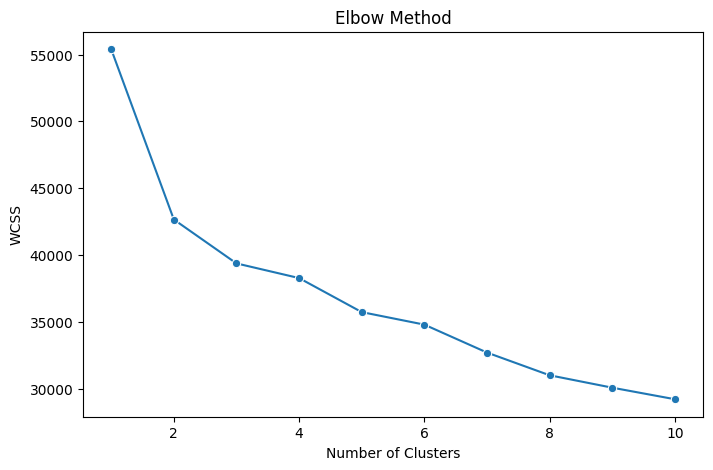

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features only
features = df.select_dtypes(include=['int64', 'float64'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


## 🔢 Step 5: Apply KMeans (k=3) and Analyze Clusters

We now apply KMeans with the optimal number of clusters and analyze the characteristics of each cluster to identify customer segments.


In [5]:
# Apply KMeans with k=3
kmeans_final = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans_final.fit_predict(scaled_data)

# Check cluster counts
df['Cluster'].value_counts()


,count
Cluster,
0,1069
1,614
2,533


## 📊 Cluster Analysis

Let’s analyze the average features of each cluster to understand how customers differ.


In [6]:
# Cluster-wise average feature values
cluster_summary = df.groupby('Cluster').mean().round(2)
cluster_summary


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalChildren,TotalSpent
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.27,3.71,35464.79,49.09,46.26,5.17,24.17,7.53,5.14,15.81,...,0.07,0.01,0.00,0.00,0.00,0.01,0.09,53.97,1.25,104.07
1,2.64,3.71,58849.84,48.16,469.86,26.49,148.62,34.48,26.36,62.89,...,0.07,0.14,0.01,0.03,0.01,0.01,0.11,59.76,1.08,768.71
2,2.35,3.78,78300.66,49.84,634.41,68.70,474.62,101.65,71.70,78.64,...,0.09,0.13,0.29,0.23,0.04,0.00,0.31,56.48,0.20,1429.72


## 🏁 Step 6: Conclusion & Recommendations

We successfully segmented MarketBoost’s customer base into **three distinct clusters** using KMeans clustering:

### 🧩 Cluster 0: Low Income, Low Spend
- Lower income customers with minimal spending
- More likely to have children
- May require budget-friendly offers or family bundles

### 🧩 Cluster 1: Middle Income, Moderate Spend
- Average earners who spend modestly
- Occasional campaign responders
- Good candidates for seasonal promotions and loyalty programs

### 🧩 Cluster 2: High Income, High Spend
- High-value, high-spending customers
- Very responsive to marketing campaigns
- Should be targeted with premium offers, VIP perks, and retention strategies

---

These insights can help MarketBoost run personalized marketing campaigns, allocate budget more efficiently, and maximize campaign ROI.
